<a id='home'></a>
<img src="img/BCTheme.png"><br>
<div style="text-align: right"><b>Filipi Destro Rigui</b> | <a href="https://www.linkedin.com/in/filipirigui/">LinkedIn</a> | <a href="https://github.com/fdrigui">Github</a></div>

| [Módulo 01](https://github.com/fdrigui/BootcampDataScience/blob/main/module_one/readme.md) | [Aula 02](https://github.com/fdrigui/BootcampDataScience/blob/main/module_one/Aula2.ipynb) |
<h1><b><span style="color:#5C0040">Aula 01:</span></b> Aquisição e leitura de dados reais</h1>


<a id='nota'></a>
______________________________________
<h2><b><span style="color:#5C0040">Anotações:</span></b></h2>

1. Antes de exportar os dados de um sistema, **pare** e **pense** na análise que se deseja fazer.
O sistema **TABNET** represam muuuitoos dados relacionados ao sistema de saúde. Numero de internações, valor gasto,, por estado, por gestor do hospital, por cidade, etc...<br>
Antes de sair baixando qualquer dado, é muito importante exercer a reflexão do que desejamos avaliar, entender, explorar, e somente após isso fazer encontrar uma maneira de pegar esses dados da fonte.
2. Exportar as informações do sistema
O arquivo **CSV** é um tipo de arquivo amplamente utilizado (mais não único), que consegue armazenar informações e ter um nível razoavelmente equilibrado entre quantidade de informações e tamanho do arquivo. Um arquivo **CSV**, pode ter como separador de informações **';'** (ponto e vírgula), **'/t'** (tabulação) e **','** (virgula).
3. Abrindo o arquivo csv<br>

```python
import pandas as pd

df_proc = pd.read_csv(filePath, sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=12)
```
a função ```read_csv``` tem muitos parâmetros para auxiliar a configurar a leitura e interpretação do arquivo.

4. Verificando inicio e fim do DataFrame<br>
O método *head* mostra o topo, as 5 primeiras linhas de um DataFrame.
```Python
df_proc.head()
```

O método de *tail* mostra a base, as ultimas 5 linhas de um DataFrame.
```Python
df_proc.tail()
```


<a id='aula'></a>
________________________________
<h2><b><span style="color:#5C0040">Aula:</span></b></h2>

In [1]:
# Importação das biblíotecas relevantes para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = "{:,.2f}".format

> O DATASUS disponibiliza informações que podem servir para subsidiar  análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde.<br>
Link para o [**DATASUS**](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)

### Importação do *valor total dos procedimentos hospitalares do SUS por UF e mês de **processamento***

**Informações da extração:**
- [**Informações de Saúde(TABNET)**](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)
- **Localização:** Informações de Saúde(TABNET)/Assistência à Saúde/Dados Consolidados AIH (RD), por local de internação, a partir de 2008/Brasil por região e unidade de Federação
- **Data:** 18-05-2021 22:35
- **Linha:** Unidade da Federação
- **Coluna:** Ano Mês processamento
- **Conteúdo:** Valor Total
- **Período:** *de:* Jan-2008 *até:* Mar-2021
- **Nome do arquivo:** /dados/A223850189_28_143_208(proc).csv

In [2]:
# URL do arquivo CSV
filePath = 'https://raw.githubusercontent.com/fdrigui/BootcampDataScience/main/module_one/dados/A223850189_28_143_208(proc).csv'

# Abre arquivo
df_proc = pd.read_csv(filePath, sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=12)
df_proc.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63",...,"11,824,687.13","11,733,307.76","10,201,985.14","7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68"
1,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53",...,"3,915,193.20","3,640,142.82","3,391,242.21","4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47"
2,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35",...,"19,769,460.14","18,059,931.43","17,841,015.63","16,408,315.10","19,895,617.91","17,765,167.69","21,430,289.17","25,917,134.55","22,032,176.22","1,917,247,936.05"
3,14 Roraima,"657,889.53","777,939.31","718,688.03","839,994.39","862,347.96","832,440.66","996,693.09","894,271.18","910,424.17",...,"3,015,488.30","2,826,486.18","2,928,043.91","3,090,313.73","3,621,031.05","3,454,460.94","3,266,928.47","3,519,773.73","3,985,530.08","328,876,965.09"
4,15 Pará,"18,864,744.11","19,553,758.20","21,937,342.70","20,842,829.69","23,249,952.88","23,240,687.56","24,002,223.56","23,341,218.03","25,172,261.32",...,"40,804,126.43","44,385,715.88","36,820,249.47","36,965,931.34","39,004,315.80","38,015,145.79","38,354,682.46","37,688,314.23","33,276,392.89","4,705,309,002.29"


### Avaliação do tamanho do DF
- O Brasil tem 26 Estados + Distrito Federal
- de Janeiro/2008 até Março/2021 têm 13 (anos 2008 - 2020) * 12 (meses por ano) + 3 (Jan-Mar/2021) + 1 (coluna Total) + 1 (coluna Unidade da Federação)

Deveríamos ter um DataFrame de 27 linhas x 161 colunas

In [3]:
print('O número de linhas e colunas: {}'.format(df_proc.shape))

O número de linhas e colunas: (27, 161)


In [4]:
# Outra maneira de fazer
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB


### Existem dados nulos (NA)?
É desejavel quue não tenhamos dados nulos em nossas tabelas, ou se tivermos, que saibamos quais são para futuro gedenciamento dos estudos

In [5]:
print('O número de células inválidas (NA) no DataFrame é: {}.'.format(df_proc.isna().sum().sum()))

O número de células inválidas (NA) no DataFrame é: 0.


### Uma verificação rápida nos tipos de cada coluna.
Espera-se que se tenha 1 colunatipo 'object', que é a Unidade Federativa e as demais tipo 'float' 

In [6]:
df_proc.dtypes.value_counts()

float64    159
object       2
dtype: int64

In [7]:
df_proc.select_dtypes(include='object').columns

Index(['Unidade da Federação', '2009/Set'], dtype='object')

Houveram 2 colunas tipo object, uma é a 'unidade da Federação', conforme esperado e outra é referente ao mês de 2009/set do  estado do Acre, que tem  um ífen (-) em vez de um valor tipo float.<br>
Como essa coluna não vai ser utilizada para esse módulo, a mesma não será alterada.

In [8]:
df_proc[['Unidade da Federação', '2009/Set']].iloc[1]

Unidade da Federação    12 Acre
2009/Set                      -
Name: 1, dtype: object

### Preparação dos dados

### Altera '/' por '-' no nome da coluna
'/' não é um caractere muito comum para se ter nos nomes das colunas.

In [9]:
df_proc.columns = df_proc.columns.str.replace('/', '-')

Nome da coluna 'Unidade da Federação'
A Coluna com o nome 'Unidade da Federação' é demazindo grande, com acento e composto por dois conjuntos: **Código do UF** e **Unidade da Federação**.<br>
Renomear de: ```Unidade da Federação``` para: ```uf_code_and_name```

In [10]:
df_proc = df_proc.rename(columns={'Unidade da Federação':'uf_code_and_name'})

### Divide ```uf_name``` em ```código``` e ```unidade federativa```
Divisão dos dois conjuntos de dados em ```uf_code_and_name``` em duas colunas distintas: ```uf_code``` e ```uf_name```

In [11]:
df_proc[['uf_code', 'uf_name']] = df_proc['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})

### Cria Dataframe de código de UF e UF
para isso nós vamos utilizar uma lista de referencia utilizada [LINK](https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html)<br>
Essa informação é importante pois os UFs não tem espaços, acentos, e são curtos, ficando melhor dispostos gráficamente.<br>
O Dicionário foi criado na mão.

In [12]:
# Cria lista na mão dos códigos UF e os UFs
uf_number_code = pd.DataFrame({"uf_code":["11", "12", "13", "14", "15", "16", "17", "21", "22", "23", "24", "25", "26", "27",
                                          "28", "29", "31", "32", "33", "35", "41", "42", "43", "50", "51", "52", "53"],
                               "uf":["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL",
                                       "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"]})

### Cria coluna 'UF' com a abreviação
Utilizando a coluna ```uf_code``` que tem códigos únicos para cada unidade federativa, fez-se um replace, subistituindo os números das unidades pelo seu código.<br>
Ex:<br>
**uf_name:** Rondônia;<br>**uf_code:** 11;<br>**uf:** RO;

In [13]:
# Cria uma coluna com o código do UF
df_proc['uf'] = df_proc['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)

# Cria uma coluna com o código do UF como cópia da anterior. Essa aqui vai se tornar o índice da tabela
df_proc['uf_i'] = df_proc['uf']

### 2.5 Define ```df_proc['uf']``` como indice

In [14]:
df_proc = df_proc.set_index('uf_i')
df_proc.head()

,uf_code_and_name,2008-Jan,2008-Fev,2008-Mar,2008-Abr,2008-Mai,2008-Jun,2008-Jul,2008-Ago,2008-Set,...,2020-Out,2020-Nov,2020-Dez,2021-Jan,2021-Fev,2021-Mar,Total,uf_code,uf_name,uf
uf_i,,,,,,,,,,,,,,,,,,,,,
RO,11 Rondônia,"1,388,528.39","2,931,283.42","1,541,682.52","1,525,314.96","1,645,953.84","1,406,150.68","3,065,279.01","3,231,494.61","3,117,178.63",...,"7,955,139.45","9,357,946.29","8,880,836.55","9,266,014.59","7,730,597.04","11,023,309.47","996,411,254.68",11,Rondônia,RO
AC,12 Acre,"902,416.00","1,497,206.26","1,794,028.48","1,730,469.42","1,819,443.92","1,828,496.00","2,511,754.59","2,089,107.14","2,275,708.53",...,"4,044,321.44","3,276,590.10","3,696,997.31","3,715,723.12","3,538,427.92","4,077,045.92","450,048,530.47",12,Acre,AC
AM,13 Amazonas,"4,735,529.42","7,118,990.57","8,196,635.49","8,259,378.42","7,831,399.90","8,477,273.62","9,368,858.72","9,352,532.70","9,363,099.35",...,"16,408,315.10","19,895,617.91","17,765,167.69","21,430,289.17","25,917,134.55","22,032,176.22","1,917,247,936.05",13,Amazonas,AM
RR,14 Roraima,"657,889.53","777,939.31","718,688.03","839,994.39","862,347.96","832,440.66","996,693.09","894,271.18","910,424.17",...,"3,090,313.73","3,621,031.05","3,454,460.94","3,266,928.47","3,519,773.73","3,985,530.08","328,876,965.09",14,Roraima,RR
PA,15 Pará,"18,864,744.11","19,553,758.20","21,937,342.70","20,842,829.69","23,249,952.88","23,240,687.56","24,002,223.56","23,341,218.03","25,172,261.32",...,"36,965,931.34","39,004,315.80","38,015,145.79","38,354,682.46","37,688,314.23","33,276,392.89","4,705,309,002.29",15,Pará,PA


## Exploração dos dados.
Nesse caso a exploração dos dados aconteceu por meio de gráficos.
Para facilitar e rreaproveitar o código, foi criado uma função que imprime os dados na tela em um gráfico de barras, possíbilitando assim a redução de tempo na impressão de outros graficos com o mesmo formato.
### Função de plot
Função que padroniza e reaproveita o código para o plot dos resultados

In [15]:
def plot_bar(xaxis, yaxis, data, title, xlabel, ylabel):
    '''
    Função plot_bar imprime na tela um gráfico padronizado do tipo de barras para cada mês
    '''
    plt.figure(figsize=(15,10))
    ax = sns.barplot(x=xaxis, y=yaxis, data=data.sort_values(by=yaxis, ascending=False), color='#1696D2')
    ax.set_title(title, fontsize=18, loc='left', family='Arial')
    ax.set_xlabel(xlabel, fontsize=12, family='Arial', style='italic')
    ax.set_ylabel(ylabel, fontsize=12, family='Arial', style='italic')
    ax.grid(b=True, axis='y', color='#DEDDDD', which='major')
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.set_facecolor('xkcd:white')
    plt.yticks(fontname = "Arial", fontsize=12)
    plt.xticks(fontname = "Arial", fontsize=12)
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
    ax.yaxis.set_major_formatter(ticks_y)
    plt.show()

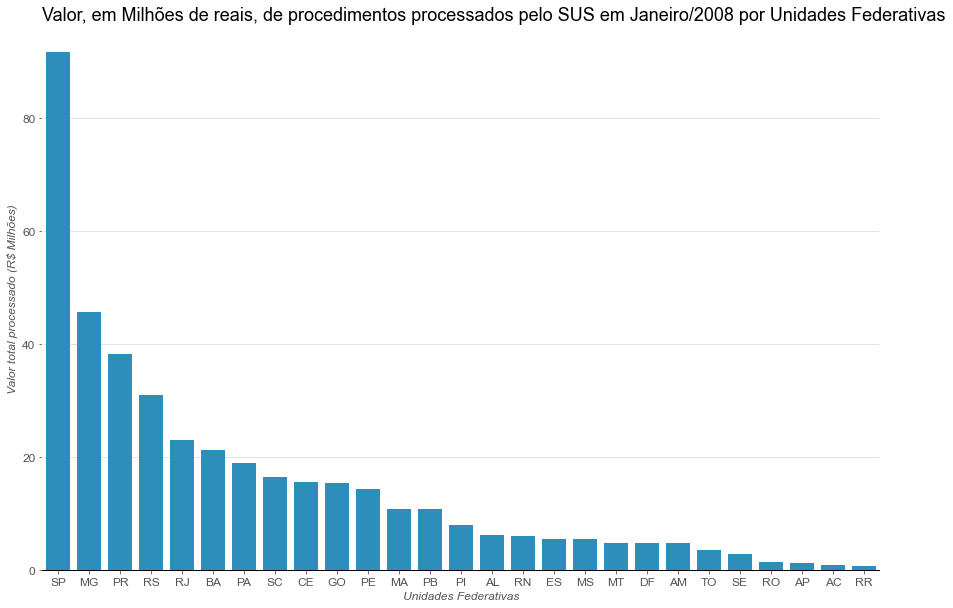

In [16]:
plot_bar(xaxis='uf', yaxis='2008-Jan', data=df_proc,
         title='Valor, em Milhões de reais, de procedimentos processados pelo SUS em Janeiro/2008 por Unidades Federativas',
         xlabel='Unidades Federativas', ylabel='Valor total processado (R$ Milhões)')

<a id='desafio'></a>
____________________
<h2><b><span style="color:#5C0040">Desafio:</span></b></h2>

<h3><b><span style="color:#5C0040">Desafio 01:</span></b> Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.</h3>

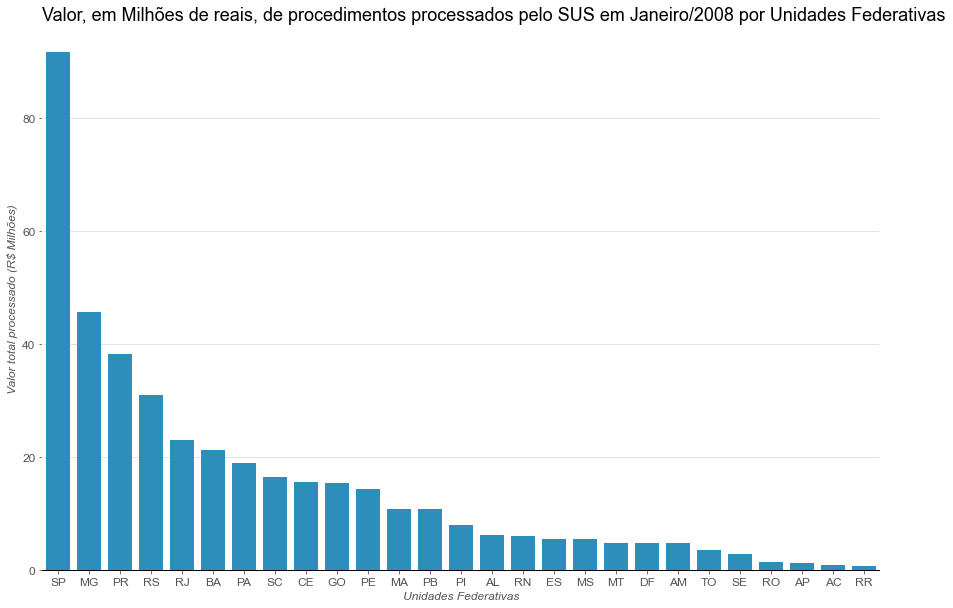

In [17]:
plot_bar(xaxis='uf', yaxis='2008-Jan', data=df_proc,
         title='Valor, em Milhões de reais, de procedimentos processados pelo SUS em Janeiro/2008 por Unidades Federativas',
         xlabel='Unidades Federativas', ylabel='Valor total processado (R$ Milhões)')

<h3><b><span style="color:#5C0040">Desafio 02:</span></b> Faça a mesma análise realizada em aula, porém para o mês mais recente.</h3>

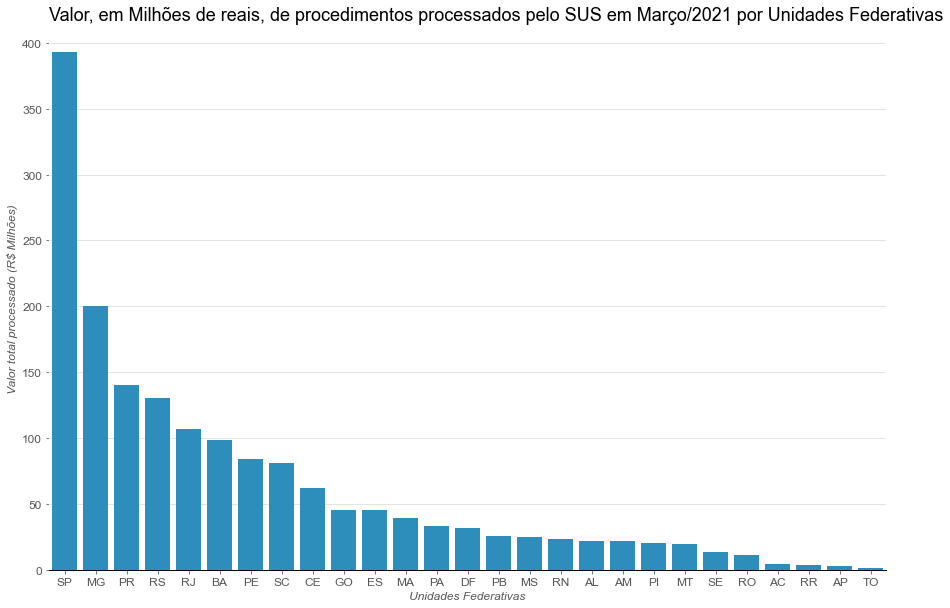

In [18]:
plot_bar(xaxis='uf', yaxis='2021-Mar', data=df_proc,
         title='Valor, em Milhões de reais, de procedimentos processados pelo SUS em Março/2021 por Unidades Federativas',
         xlabel='Unidades Federativas', ylabel='Valor total processado (R$ Milhões)')

___________________________________________________
| [Home](#home) | [Aula 02](https://github.com/fdrigui/BootcampDataScience/blob/main/module_one/Aula2.ipynb) |